In [65]:
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import pandas as pd
import numpy as np
import math

Sia $C$ una variabile aleatoria distribuita secondo unun modello binomiale di parametri $n_C$ e $p_C$ $\in$ $[0, 1]$. Nel resto del tema d'esame $C$ modellerà il numero di bottiglie d'acqua minerale di una certa marca che un nucleo familiare acquista nell'arco di una settimana.

**1.** Quali valori può assumere il parametro $n_C$? e quali valori può assumere $C$? Giustificate la risposta

**2.** Indichiamo con $f_C$ la funzione di massa di probabilità della variabile aleatoria $C$. Scrivete la forma analitica di $f_C$ in dipendenza dai parametri indicati al punto precedente e di una generica specificazione $x$ della variabile aleatoria $C$.

**3.** Fissiamo, **solo in questo punto**, $n_C$ = 20 e $p_C$ = 0.8. Utilizzando il computer visualizzate graficamente l'andamento di $f_C$($x$) al variare di $x$, **nella zona in cui questa funzione assume valori sensibilmente diversi da zero**. Come avete scelto i valori minimo e massimo per $x$?

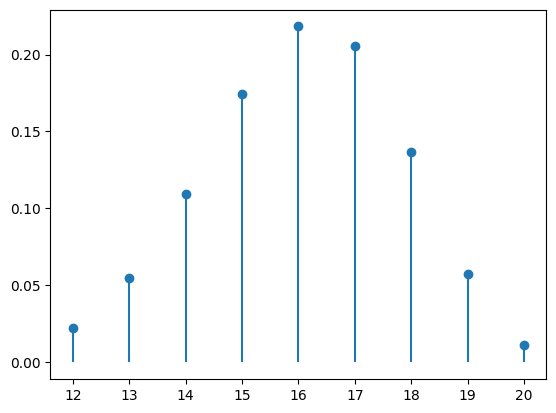

In [11]:
nc = 20 
pc = 0.8

Z = st.binom(nc,pc)

x = range(int(Z.ppf(0.01)), int(Z.ppf(0.99))+1, 1)
plt.plot(x,Z.pmf(x), 'o')
plt.vlines(x,0,Z.pmf(x))
plt.show()

## Esercizio 2

A ogni acquisto, il distributore effettua uno sconto di $x$ euro per ogni bottiglia vuota resa. Ipotizziamo che il numero di bottiglie rese da un nucleo familiare in una settimana sia descritto da una variabile aleatoria $R$ distribuita secondo un modello binomiale di parametri $n_R$ $\in$ $\mathbb{N}$ e $p_R$ $\in$ $[0, 1]$. In questo esercizio supporremo che $n_C$ e $n_R$ **assumano valori piccoli**.

**1.** Indichiamo con $p$ il prezzo di acquisto di una bottiglia. Che cosa modella la variabile aleatoria $T$ =  $pC - sR$?

**2.** La distribuzione esatta di $T$ è nota? Se si, indicate a quale modello si riferisce e specificate i relativi parametri. Cambia qualcosa nel caso fossimo interessati a una distribuzione approssimata?

**3.** Indichiamo con $\mu_T$ il valore atteso di $T$. Esprimete $\mu_T$ in funzione dei parametri sopra introdotti, giustificando i passaggi matematici intermedi.


**4.** Indichiamo con $\sigma_T$ la deviazione standard di $T$. Esprimete $\sigma_T$ in funzione dei parametri sopra introdotti, giustificando anche in questo caso i passaggi matematici intermedi.


## Esercizio 3

Indichiamo con $n$ $\in$ $\mathbb{N}$ il numero totale di clienti del distributore, e con $C_1,...,C_n$ le variabili aleatorie che indicano il numero di bottiglie acquistate in una settimana da ogni cliente. Analogamente, siano $R_1,...,R_n$ le variabili aleatorie che indicano il numero di bottiglie rese in una settimana. Assumiamo, infine, che vi sia indipendenza tra le abitudini di acquisto dei vari clienti. In questo esercizio supporremo che $n$ assuma **un valore elevato**.


**1.** Esiste un modello che descrive in modo esatto la distribuzione della variabile aleatoria $C_{tot} = \sum_{i=1}^{n} C_i$? In caso affermativo, indicare quali sono i suoi parametri, giustificando la vostra risposta.


**2.** Esiste un modello che approssima ragionevolmente bene la distribuzione di $C_{tot}$? In caso affermativo, indicate quali sono i suoi parametri, giustificando la vostra risposta.


**3.** Se nelle domande 1 e 2 di questo esercizio sostituiamo $C_{tot}$ con $R_{tot} = \sum_{i=1}^{n} R_i$, le risposte cambiano significativamente? Perchè?


**4.** Che cosa modella la variabile aleatoria $T_{tot} = pC_{tot} - sR_{tot}$?


**5.** Esiste un modello che descrive la distribuzione di $T_{tot}$? In caso affermativo, indicate quali sono i suoi parametri, e in caso negativo indicare un modello che approssima ragionevolmente la distribuzione, sempre specificandone i parametri.


## Esercizio 4

Il file "acquisti.csv" contiene le seguenti informazioni raccolte settimanalmente dal distributore dell'acqua della marca considerata nell'arco di più anni (il carattere `,` separa le colonne):
* *bottiglie_acquistate:* numero totale di bottiglie acquistate dei clienti dal distributore in una settimana;
* *bottiglie_rese:* numero totale di bottiglie rese dai clienti dal distributore in una settimana;
* *temperatura:* temperatura media nella settimana di riferimento;

**1.** Scrivete ed eseguite del codice che calcoli la percentuale di casi del dataset che contengono almeno un valore mancante


In [25]:
acquisti = pd.read_csv('acquisti.csv', sep = ',')
acquisti

print(f'{(11/len(acquisti))*100}%')
print(len(acquisti.bottiglie_acquistate.unique()))

0.27499999999999997%
331


**2.** Descrivete l'attributo *bottiglie_acquistate* utilizzando la rappresentazione grafica che ritenete più adeguata, motivando la scelta fatta e commentando i risultati ottenuti.


bottiglie_acquistate è un attributo quantitativo discreto, per cui la rappresentazione grafica più appropriata è un grafico a barre. Tuttavia, siccome i valori possibili sono tantissimi, il grafico a barre diventa difficile da leggere. Per cui, in questo caso è più appropriato usare un istogramma.


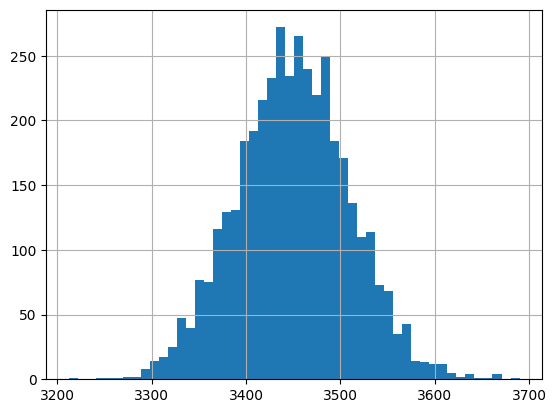

'plt.bar(acquisti.bottiglie_acquistate.value_counts().sort_index().index, acquisti.bottiglie_acquistate.value_counts().sort_index().values)\nplt.xlim((3200,3700))\nplt.ylim(0, 1200)\nplt.show()'

In [44]:
print('bottiglie_acquistate è un attributo quantitativo discreto, per cui la rappresentazione grafica più appropriata è un grafico a barre. Tuttavia, siccome i valori possibili sono tantissimi, il grafico a barre diventa difficile da leggere. Per cui, in questo caso è più appropriato usare un istogramma.')
acquisti.bottiglie_acquistate.hist(bins=50)
plt.show()
'''plt.bar(acquisti.bottiglie_acquistate.value_counts().sort_index().index, acquisti.bottiglie_acquistate.value_counts().sort_index().values)
plt.xlim((3200,3700))
plt.ylim(0, 1200)
plt.show()'''

**3.** L'ipotesi fatta all'inizio dell'esercizio 3 dovrebbe consentire di utilizzare un istogramma in alternativa alla rappresentazione del punto precedente; perchè? Visualizzate tale istogramma, scegliendo opportunamente il numero di intervalli da considerare.

In [41]:
print('Ho già scelto prima un istogramma.')

Ho già scelto prima un istogramma.


**4.** Valutate l'ipotesi che vi sia una relazione di tipo diretto tra gli attributi *bottiglie_acquistate* e *temperatura*, utilizzando in modo opportuno sia un metodo grafico sia un indice numerico. Commentate i risultati ottenuti.


Per valutare tale ipotesi possiamo costruire uno scatter plot, esaminarlo e poi confermare l ipotesi con il valore dell indice di correlazione lineare.


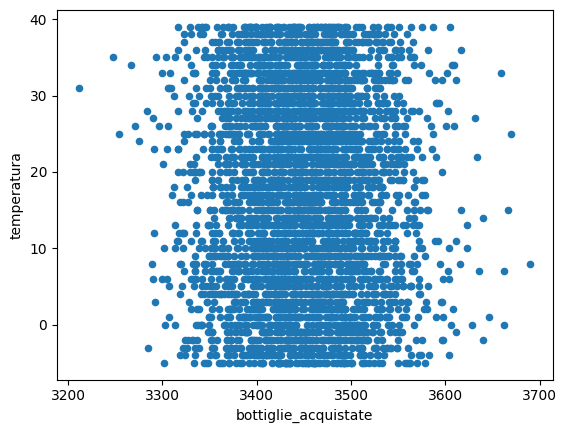

Lo scatter plot mostra come non ci sia una relazione di tipo diretto tra i due attributi (in realtà non vi è alcuna relazione tra i due attributi, neanche indiretta) per cui possiamo confutare l ipotesi.
-0.006180512682684299
L indice di correlazione lineare prossimo a 0 conferma tale ipotesi.


In [47]:
print('Per valutare tale ipotesi possiamo costruire uno scatter plot, esaminarlo e poi confermare l ipotesi con il valore dell indice di correlazione lineare.')
acquisti.plot.scatter('bottiglie_acquistate', 'temperatura')
plt.show()
print('Lo scatter plot mostra come non ci sia una relazione di tipo diretto tra i due attributi (in realtà non vi è alcuna relazione tra i due attributi, neanche indiretta) per cui possiamo confutare l ipotesi.')
print(acquisti.bottiglie_acquistate.corr(acquisti.temperatura))
print('L indice di correlazione lineare prossimo a 0 conferma tale ipotesi.')

**5.** Una bottiglia d'acqua costa 1€, e il distributore sconta 10 centesimi per ogni bottiglia resa. Aggiungete al dataset una colonna dal nome *ricavo* che contenga il ricavo settimanale per ogni caso.


In [49]:
acquisti['ricavo'] = pd.Series([(acquisti.bottiglie_acquistate[i]-(0.10*acquisti.bottiglie_rese[i])) for i in acquisti.index], name="ricavo")
acquisti

,bottiglie_acquistate,bottiglie_rese,temperatura,ricavo
0,3481.0,1324.0,18.0,3348.6
1,3463.0,NaN,10.0,NaN
2,3464.0,1353.0,39.0,3328.7
3,3527.0,986.0,0.0,3428.4
4,3367.0,2190.0,-3.0,3148.0
...,...,...,...,...
3995,3516.0,1046.0,7.0,3411.4
3996,3420.0,1669.0,32.0,3253.1
3997,3487.0,1472.0,14.0,3339.8
3998,3552.0,1957.0,9.0,3356.3


**6.** Valutate l'ipotesi che il ricavo settimanale di ogni acquisto sia ben descritto da un modello normale, commentando i risultati ottenuti.


Per valutare tale ipotesi si può costruire un qqplot, una rappresentazione grafica che prende in considerazione due campioni al fine di valutare che questi seguano la stessa distribuzione.


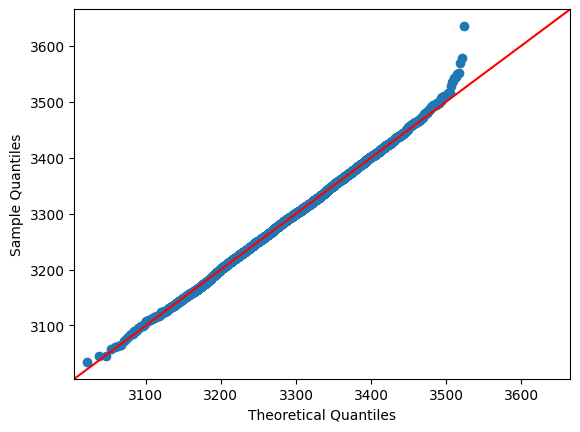

Come si vede i punti corrispondenti alle coppie quantili empirici-quantili teorici si adagiano bene sulla bisettrice di 45 gradi,
per cui si può validare l ipotesi che il ricavo segua una distribuzione normale. Se si vuole essere proprio sicuri
si può mostare il valore di media e mediana che coincide, ma abbiao già il qqplot che ci valida l ipotesi.
3299.6993485342023 3300.0


In [55]:
print('Per valutare tale ipotesi si può costruire un qqplot, una rappresentazione grafica che prende in considerazione due campioni al fine di valutare che questi seguano la stessa distribuzione.')
sm.qqplot(acquisti.ricavo, dist = st.norm(loc=acquisti.ricavo.mean(), scale = acquisti.ricavo.std()), line = "45")
plt.show()
print('Come si vede i punti corrispondenti alle coppie quantili empirici-quantili teorici si adagiano bene sulla bisettrice di 45 gradi,\nper cui si può validare l ipotesi che il ricavo segua una distribuzione normale. Se si vuole essere proprio sicuri\nsi può mostare il valore di media e mediana che coincide, ma abbiao già il qqplot che ci valida l ipotesi.')
print(acquisti.ricavo.mean(), acquisti.ricavo.median())

**7.** Alla luce dei risultati ottenuti al punto precedente, è opportuno rivedere le ipotesi fatte all'inizio dell'esercizio 3? Perchè? E quali ipotesi devono essere riesaminate?


**8.** Valutate l'ipotesi che il numero di bottiglie acquistate sia ben descritto da un modello normale, commentando i risultati ottenuti.


Anche in questo caso valutiamo l ipotesi mediante un qqplot


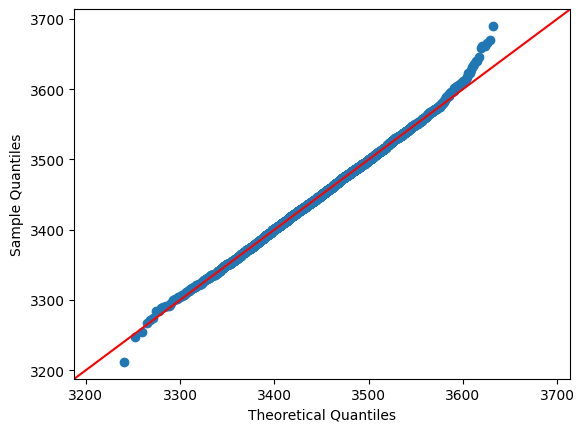

Valgono le stesse considerazioni fatte prima: anche in questo caso bottiglie_Acqusitate segue una distribuzione normale.
3450.124124124124 3450.0


In [58]:
print('Anche in questo caso valutiamo l ipotesi mediante un qqplot')
sm.qqplot(acquisti.bottiglie_acquistate, dist=st.norm(loc=acquisti.bottiglie_acquistate.mean(), scale = acquisti.bottiglie_acquistate.std()), line = "45")
plt.show()
print('Valgono le stesse considerazioni fatte prima: anche in questo caso bottiglie_Acqusitate segue una distribuzione normale.')
#print(acquisti.bottiglie_acquistate.mean(), acquisti.bottiglie_acquistate.median())

## Esercizio 5

In questo esercizio interpreteremo i valori dell'attributo *bottiglie_acquistate* come un campione casuale estratto da una popolazione distribuita come la variabile aleatoria $C_{tot}$ definita nell'esercizio 3, e i valori dell'attributo *ricavo* come un campione casuale estratto da una popolazione $T$.


**1.** Stimate il valore atteso della popolazione descritta dalla variabile aleatoria $C_{tot}$, indicando la dimensione del campione utilizzato e specificando eventuali proprietà dello stimatore utilizzato.


In [63]:
print(f'Lo stimatore che si può usare è la media campionaria, pari a {acquisti.bottiglie_acquistate.mean()}, avente come dimensione {len(acquisti.bottiglie_acquistate.dropna())}. Essendo la media\ncampionaria, essa è non distorta per il valore atteso della popolazione ed è anche consistente in media quadratica.')

Lo stimatore che si può usare è la media campionaria, pari a 3450.124124124124, avente come dimensione 3996. Essendo la media
campionaria, essa è non distorta per il valore atteso della popolazione ed è anche consistente in media quadratica.


**2.** Stimate la deviazione standard della popolazione descritta dalla variabile aleatoria $C_{tot}$,  specificando eventuali proprietà dello stimatore utilizzato. La dimensione del campione utilzzato è la stessa del punto precendete? Perchè?


In [67]:
print(f'Lo stimatore che si può usare è la varianza campionaria, pari a {math.sqrt(acquisti.bottiglie_acquistate.var())}, avente come dimensione {len(acquisti.bottiglie_acquistate.dropna())}. Essendo la varianza\ncampionaria, essa è non distorta per la varianza della popolazione, ma non sappiamo se lo è anche per la deviazione standard della popolazione.')

Lo stimatore che si può usare è la varianza campionaria, pari a 60.03789465497488, avente come dimensione 3996. Essendo la varianza
campionaria, essa è non distorta per la varianza della popolazione, ma non sappiamo se lo è anche per la deviazione standard della popolazione.


**3.** Il magazzino del distributore riceve ogni settimana 3600 bottiglie. Come potete indicare, in funzione di un'appropriata quantità precedentemente utilizzata, l'evento $E$ che si verifica se queste bottiglie non sono sufficienti a soddisfare la domanda dei clienti?


**4.** Sulla base del risultato del punto 8 dell'esercizio 4, calcolate la probabilità dell'evento $E$ desritto al punto precedente.


In [72]:
Z = st.norm(acquisti.bottiglie_acquistate.mean(), acquisti.bottiglie_acquistate.std())
print(f'P(E) = {1-Z.cdf(3600)}')
#print(acquisti.bottiglie_acquistate)

P(E) = 0.006273854495658315


**5.** Stimate il valore atteso della popolazione $T$, indicando quale stimatore avete utilizzato.


In [74]:
print(f'Lo stimatore che si può usare è la media campionaria, pari a {acquisti.ricavo.mean()}, avente come dimensione {len(acquisti.ricavo.dropna())}. Essendo la media\ncampionaria, essa è non distorta per il valore atteso della popolazione ed è anche consistente in media quadratica.')

Lo stimatore che si può usare è la media campionaria, pari a 3299.6993485342023, avente come dimensione 3991. Essendo la media
campionaria, essa è non distorta per il valore atteso della popolazione ed è anche consistente in media quadratica.


**6.** Siete in grado di calcolare la probabilità che la stima fatta al punto precedente disti, per eccesso o per difetto, più di 10€ rispetto al valore sconosciuto?


In [76]:
Z = st.norm(0,1)
n = math.sqrt(len(acquisti.ricavo.dropna()))*10
print(1-Z.cdf(n/acquisti.ricavo.std()))

1.1102230246251565e-15
